## Cramers method

In [4]:
# Finding solutions using Cramers rule
import numpy as np
import math
import matplotlib.pyplot as plt

    

In [2]:
def cramer_rule(sz=3,mat=[],rhs = []):
    assert len(mat)%3 == 0,"your matrix size doesn't match your unknowns"
    assert len(rhs) == sz,"your unknowns and rhs values are of not same size"
    mat = np.array(mat).reshape(sz,sz)
    rhs = np.array(rhs)
    base_det = np.linalg.det(mat)
    roots = []
    intermediate_dets = []
    for i in range(sz):
        #modifying the original array
        #creating a copy so that original matrix stays intact
        new_arr = np.array(mat)
        new_arr[:,i] = rhs
        i_det = np.linalg.det(new_arr)
        intermediate_dets.append(i_det)
        roots.append(i_det/base_det)
    return roots,intermediate_dets
    



In [3]:
sz = 3
mat = [3,4,2,-1,3,-4,2,2,5]
rhs = [5,2,-6]
roots,inter_dets = cramer_rule(sz,mat,rhs)

In [4]:
roots

[5.243902439024392, -1.2926829268292688, -2.780487804878049]

In [5]:
roots

[5.243902439024392, -1.2926829268292688, -2.780487804878049]

In [6]:
np.array(mat).reshape(sz,sz)@np.array(roots).reshape(sz,1)

array([[ 5.],
       [ 2.],
       [-6.]])

In [39]:
#sanity check


np.allclose(np.array(rhs).reshape(sz,1),np.array(mat).reshape(sz,sz)@np.array(roots).reshape(sz,1))

True

## Newtons method

In [6]:
def plot(f,st=-10,end=10,count=100):
    import matplotlib.pyplot as plt
    x = np.linspace(st,end,count)
    y = [f(i) for i in x]
    plt.plot(x,y)
    

In [1]:
func = lambda x: 0.5+(x**2)/4-(x*math.sin(x))-0.5*math.cos(2*x)
grad_func = lambda x: (x/2)-(math.sin(x)+x*math.cos(x))+math.sin(2*x)

In [2]:
#just a fancy way of writing functions you can as well write as
def func(x):
    return 0.5+(x**2)/4-(x*math.sin(x))-0.5*math.cos(2*x)

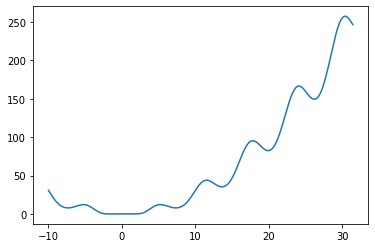

In [7]:
plot(func,-10,10*math.pi,1000)

In [9]:
def newton(func,grad,start=math.pi/2,tolerance=10**(-5),max_iter=30,debug=True,domain=None):
    cnt = 0
    halt=False
    estimates = []
    while cnt<max_iter and not halt:
        #try:
        next_x = start - (func(start)/grad(start))
        #except:
            #print(start)
            #import pdb;pdb.set_trace()
        estimates.append(next_x)
        if abs(start-next_x)<= tolerance:
            halt = True
        cnt += 1
        if debug:
            print(f"iter:{cnt} value:{next_x}")
        
        if domain:
            if not domain[0]<= next_x <= domain[-1]:
                next_x = np.clip(next_x,*domain)
        start = next_x
    if cnt == max_iter:print(f"Process Terminated with failure")
    return estimates
        
    
    

In [14]:
_  = newton(func,grad_func,start=math.pi/2)

iter:1 value:1.7853981633974485
iter:2 value:1.844561629601785
iter:3 value:1.8708344176888603
iter:4 value:1.8833464269272087
iter:5 value:1.8894637641822818
iter:6 value:1.8924896245342566
iter:7 value:1.8939945683559554
iter:8 value:1.8947450696912427
iter:9 value:1.8951198309096426
iter:10 value:1.8953070895523099
iter:11 value:1.895400688430785
iter:12 value:1.8954474802670205
iter:13 value:1.8954708742847959
iter:14 value:1.895482570825859
iter:15 value:1.8954884189618357


In [50]:
#eg:2

func1 = lambda x: x**2 - 10*math.cos(x)
grad1 = lambda x: 2*x + 10*math.sin(x)

In [52]:
_ = newton(func1,grad1,start=-100.0,tolerance=10**-4)

iter:1 value:-48.74543849889916
iter:2 value:-21.596769093971908
iter:3 value:-11.484219569105008
iter:4 value:-2.488158340945553
iter:5 value:-1.2099747956554148
iter:6 value:-1.3854492522796145
iter:7 value:-1.3793702695076215
iter:8 value:-1.3793645942270283


## Some advanced magic(beyond the scope of this course)

In [48]:
# Autodiff


